# Barton Springs Salamanders & Watershed Quality Report
### Benjamin Goad, Michelle Gelman, Nick Hoang, Daphne Lopez

Import libraries

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,date as dt
import sklearn as sk
import re 

### Data Prep
Read in the data set and print out the head

In [192]:
rawData  = pd.DataFrame(pd.read_csv("Barton_Springs_Salamanders_DO_and_Flow.csv"))
print(rawData.columns)

ID_FEATURE = "SITE_NAME"

rawData.head(1000)

Index(['WATERSHED', 'SAMPLE_DATE', 'SITE_NAME', 'LON_DD_WGS84', 'LAT_DD_WGS84',
       'SITE_TYPE', 'MEDIUM', 'PARAM_TYPE', 'PARAMETER', 'QUALIFIER', 'RESULT',
       'UNIT', 'FILTER', 'SAMPLE_ID', 'SAMPLE_SITE_NO', 'METHOD', 'QC_FLAG',
       'PROJECT', 'DATA_REF_NO', 'SAMPLE_REF_NO', 'TIME_NULL', 'QC_TYPE'],
      dtype='object')


C:\Users\nicho\AppData\Local\Temp\ipykernel_26056\3513658504.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  rawData  = pd.DataFrame(pd.read_csv("Barton_Springs_Salamanders_DO_and_Flow.csv"))


,WATERSHED,SAMPLE_DATE,SITE_NAME,LON_DD_WGS84,LAT_DD_WGS84,SITE_TYPE,MEDIUM,PARAM_TYPE,PARAMETER,QUALIFIER,...,FILTER,SAMPLE_ID,SAMPLE_SITE_NO,METHOD,QC_FLAG,PROJECT,DATA_REF_NO,SAMPLE_REF_NO,TIME_NULL,QC_TYPE
0,Barton Creek,07/06/1990 12:00:00 AM,Barton Spring,-97.770980,30.263535,Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,NaN,...,Dissolved,NaN,35,UNKNOWN,U,Water Watch Dog,2387519,479314,Y,NaN
1,Barton Creek,07/01/1991 12:00:00 AM,Barton Spring,-97.770980,30.263535,Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,NaN,...,Dissolved,NaN,35,HACH TEST KIT,U,Water Watch Dog,1053022,67681,Y,NaN
2,Barton Creek,08/02/1991 12:00:00 AM,Barton Spring,-97.770980,30.263535,Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,NaN,...,Dissolved,NaN,35,HACH TEST KIT,U,Water Watch Dog,557211,67682,Y,NaN
3,Barton Creek,10/11/1991 12:00:00 AM,Barton Spring,-97.770980,30.263535,Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,NaN,...,Dissolved,NaN,35,HACH TEST KIT,U,Water Watch Dog,1052978,67677,Y,NaN
4,Barton Creek,06/04/1992 11:00:00 AM,Barton Spring,-97.770980,30.263535,Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,NaN,...,Dissolved,NaN,35,UNKNOWN,U,Water Watch Dog,2335102,450308,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Barton Creek,04/12/2001 12:00:00 AM,Eliza Spring,-97.770061,30.264246,Spring,Benthic Cover,Salamanders,AUSTIN BLIND SLMNDR (<1IN.) (JUVENILE),NaN,...,Total,NaN,428,VISUAL ASSESSMENT,U,Barton Springs Salamander,1705157,342910,Y,NaN
996,Barton Creek,04/12/2001 12:00:00 AM,Eliza Spring,-97.770061,30.264246,Spring,Benthic Cover,Salamanders,AUSTIN BLIND SALMNDR (ADULT) > 1 INCH,NaN,...,Total,NaN,428,VISUAL ASSESSMENT,U,Barton Springs Salamander,1705158,342910,Y,NaN
997,Barton Creek,04/12/2001 12:00:00 AM,Eliza Spring,-97.770061,30.264246,Spring,Benthic Cover,Salamanders,SALAMANDER (UNKNOWN LENGTH),NaN,...,Total,NaN,428,VISUAL ASSESSMENT,U,Barton Springs Salamander,1680711,342910,Y,NaN
998,Barton Creek,04/12/2001 12:00:00 AM,Eliza Spring,-97.770061,30.264246,Spring,Benthic Cover,Salamanders,AUSTIN BLIND SALAMANDER (UNKNOWN LENGTH),NaN,...,Total,NaN,428,VISUAL ASSESSMENT,U,Barton Springs Salamander,1705163,342910,Y,NaN


- Create new dataset using sample ID as the index
- Aggregate different PARAM_TYPEs and incorporate them as features in the new data set

## Feature Engineering Plan
- [ ] aggregate sample IDS by parameter types:
    - [ ] get result and unit for each paramater type
    - [ ] do cleanintg for null values
    - [ ] print out a scatter plot for each paratamer_type(check for outliers before normalizing)
    - [ ] print out statistics on each (std, mean, var -> maybe add each as a new column)
    - [ ] groupBy time_null-> see how many records dont have a date. do a time series plot for result + time for each salamander parameter
## What data might we need?
 - how do we condiser the other paramater types? We could maybe see the days when samples were collected, and add salamander paramater as a new feature. Groupby site name?
 - how do salamander poplations vary at different types?
 - what paramater types have a (+/-) correlation with salamnder populations?
 - do any of the paramater types have an affect on the salamnder sizes? does the season explain it, or is it something about the paramater type at that site?
 - maybe we could get a data set with mineral content or weather data? what about water levels?
- [ ] Don't need qualifier, sample IDs, filter, don't need sample_id, sample_site_no, 


In [193]:
print(len(rawData))
groupedData = rawData.groupby('PARAM_TYPE')
#salamanderData = groupedData[groupedData['PARAM_TYPE'] == 'Salamanders']
groupedData[['PARAM_TYPE','RESULT', 'UNIT']].head(49466)
groupedData.head().std()
groupedData.mean()
#groupedData.get_group('Salamanders')
#groupedData.size()
#print(rawData.columns)
#print(groupedData.columns)
#print(rawData["PARAM_TYPE"].isna().sum())
# dataset w/ uneeded columns removed

#Check our data
dups = rawData["LON_DD_WGS84"].unique()
dupSites = rawData["SAMPLE_SITE_NO"].unique()
dupSitesName = rawData["SITE_NAME"].unique()
#this one is mostly null
qual = rawData["QUALIFIER"].isna().sum()
mediums = rawData["MEDIUM"].unique()
paramTypes = rawData["PARAM_TYPE"].unique()
methods = rawData["METHOD"].unique()
params = rawData["PARAMETER"].unique()
filter = rawData["FILTER"].unique()
unit = rawData["UNIT"].unique()
print(dups)
print(dupSites)
print(dupSitesName)
print(qual)
print(mediums)
print(paramTypes)
print(methods)
print(params)
print(rawData[["METHOD", "PARAM_TYPE", "QUALIFIER"]])
print(filter)
print(unit)

data = rawData.copy()
#Covert time column to time type and remove time collected
print(data["WATERSHED"].unique())
print(type(data["SAMPLE_DATE"]))
date_format = pd.to_datetime(data["SAMPLE_DATE"]).dt.date
data["SAMPLE_DATE"] = date_format
#print(type(date_format))
#print(type(data["SAMPLE_DATE"]))


#Drop uneeded columns
data.drop(columns= ["LON_DD_WGS84","LAT_DD_WGS84","DATA_REF_NO","PROJECT", "QC_FLAG", "QC_TYPE", "SITE_TYPE", "SAMPLE_ID", "WATERSHED", "SAMPLE_SITE_NO", "QUALIFIER", "SAMPLE_REF_NO", "METHOD", "TIME_NULL" ], inplace=True)

data.head()



#lambda row: re.findall(r'()', row)
#param_type_pasrsed = rawData["PARAM_TYPE"].split(""


49466
[-97.77097968 -97.76807574 -97.77006059 -97.7737817  -97.77443041
 -97.76809893]
[  35  422  428  183  185 3594]
['Barton Spring' 'Old Mill (Sunken Gardens) Spring' 'Eliza Spring'
 'Upper Barton Spring' 'High Barton Spring'
 'Old Mill Stream (outflow from Sunken Gardens Pool)']
49421
['Surface Water' 'Benthic Cover' 'Ground Water' 'Sediment' 'Habitat'
 'Fish/Salamander']
['Oxygen' 'Salamanders' 'Flow/Rainfall' 'Temporal' 'Physicals' 'Spatial']
['UNKNOWN' 'HACH TEST KIT' 'VISUAL ASSESSMENT'
 'HORIBA WATER QUALITY METER' 'TCEQ FLOW SEVERITY' 'MARSH McBIRNEY METER'
 'VISUAL FLOW ESTIMATION' 'USGS FLOW MEASUREMENT' 'Quanta Probe'
 'HYDROLAB' 'YSI Probe' 'CALCULATION' 'SATUROMETER' 'MEASURING TAPE/RULER'
 'LAMOTTE TITRATION KIT' 'Flow Tracker' 'USGS Combined Discharge Rating'
 'HYDROMETER' 'STOPWATCH' 'EPA 350.3' 'Hach FH950' 'In-Situ Aqua Troll']
['DISSOLVED OXYGEN' 'BARTON SPRINGS SLMNDR  (TOTAL <1IN.)'
 'BARTON SPGS SALMNDR  (ADULT) > 1 INCH' 'SALAMANDER (UNKNOWN LENGTH)'
 'FLOW SE

C:\Users\nicho\AppData\Local\Temp\ipykernel_26056\3722968296.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  groupedData.head().std()


,SAMPLE_DATE,SITE_NAME,MEDIUM,PARAM_TYPE,PARAMETER,RESULT,UNIT,FILTER
0,1990-07-06,Barton Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,64.0,(%) Percent,Dissolved
1,1991-07-01,Barton Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,6.3,MG/L,Dissolved
2,1991-08-02,Barton Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,9.0,MG/L,Dissolved
3,1991-10-11,Barton Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,10.0,MG/L,Dissolved
4,1992-06-04,Barton Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,6.5,MG/L,Dissolved


In [194]:
#Need to clean null values and also check what is unknown. Does it matter? Does it lead to significant outliers?
print("Missing values:")
print(data.isnull().sum())
# remove rows with missing sampleIDs, Filter, and Result
#salamanders of unknown length are noise
data2 = data.copy()
data2.dropna(subset=[ 'FILTER', 'RESULT'])
#data2.drop(data2.loc[data2["PARAMETER"] == 'AUSTIN BLIND SALAMANDER (UNKNOWN LENGTH)'])
#data2.drop(data2.loc[data2["PARAMETER"] == 'AUSTIN BLIND SALAMANDER (UNKNOWN LENGTH)'])
print("Missing values:")
print(data2.isnull().sum())
data = data2

Missing values:
SAMPLE_DATE      0
SITE_NAME        0
MEDIUM           0
PARAM_TYPE       0
PARAMETER        0
RESULT           2
UNIT             0
FILTER         695
dtype: int64
Missing values:
SAMPLE_DATE      0
SITE_NAME        0
MEDIUM           0
PARAM_TYPE       0
PARAMETER        0
RESULT           2
UNIT             0
FILTER         695
dtype: int64


In [195]:

#data = data.loc[dtaa["PARAMETER"] == 'BARTON SPRINGS SLMNDR (1-2IN.) IN VEGETATION/MOSS']
print(len(data))
data4 = data.loc[data["PARAMETER"] == 'SALAMANDERS NOT PHOTGRAPHED 1-2 INCHES']
data5 = data.loc[data["PARAMETER"] == 'SALAMANDERS NOT PHOTGRAPHED >2 INCHES']
data6 = data.loc[data["PARAMETER"] == 'SALAMANDERS PHOTGRAPHED 1-2 INCHES']
data7 = data.loc[data["PARAMETER"] == 'SALAMANDERS PHOTGRAPHED <1 INCH']
data10 = data.loc[data["PARAMETER"] == 'SALAMANDERS PHOTGRAPHED >2 INCHES']
data8 = data.loc[data["PARAMETER"] == 'NUMBER OF BARTON SPRINGS SALAMANDERS PHOTOGRAPHED']
data9 = data.loc[data["PARAMETER"] == 'NUMBER OF AUSTIN BLIND SALAMANDERS PHOTOGRAPHED']
data11 = data.loc[data["PARAMETER"] =='AUSTIN BLIND SLMNDR (<1IN.)  (JUVENILE)']
data11 = data.loc[data["PARAMETER"] =='AUSTIN BLIND SLMNDR (<1IN.)  (JUVENILE)']

print(len(data4))
print(len(data5))
print(len(data6))
print(len(data7))
print(len(data8))
print(len(data9))
print(len(data10))
print(len(data11))

data3 = rawData.loc[rawData["PARAMETER"].str.contains('VEGETATION/MOSS')]
print(len(data3))
print(data3["MEDIUM"].unique())
data_Res = data.loc[data["UNIT"] == "Sq Ft"]


49466
7
7
10
10
198
198
10
2683
2984
['Benthic Cover']


In [199]:
dictkeys = {'VEGETATION/MOSS': [], 'COBBLE/BOULDER':[], 'EXPOSED SUBSTRATE': [], 'ROCK SUBSTRATE':[], "LEAF LITTER": [], 'DISSOLVED OXYGEN': []}

# Austin sal is 0
# Barton sal is 1

#veg = 0, cobble = 1, exposed =2, rock = 3, leaf = 4

def param_parser(row):
    surfaces = ['VEGETATION/MOSS', 'COBBLE/BOULDER', 'EXPOSED', "LEAF LITTER"]
    sizes = [1,2]
    salamanders =["AUSTIN", "BARTON"]
    new_cols = {"SALAMANDER": 0, "SIZE": 0, "SURFACE": 0}

        
    size_idx_2 = row.find(str(2))
    size_idx_1 = row.find(str(1))

    if size_idx_1 == -1:
        new_cols["SIZE"] = 2

    elif size_idx_1 != -1 and size_idx_2 != -1:
            new_cols["SIZE"] = 1.5
    else:
        new_cols["SIZE"] = 1

    if size_idx_1 == -1 and size_idx_2 == -1:
        #print("hit here")
        return [0, 0, 0]

    surface_idx = -1

    for surface in surfaces:
        surface_idx = row.find(surface)
        if surface_idx != -1:
            #print("found surface")
            surface_str = row[surface_idx:]
            new_cols["SURFACE"] = surface_str
            break

    if (surface_idx == -1):
        #print("hit here 2")
        return [0,0,0]


    if row[0:1] == 'A':
        new_cols["SALAMANDER"] = 0
    else:
        new_cols["SALAMANDER"] = 1

    
    return list(new_cols.values())


sal_data = data.loc[data["PARAM_TYPE"] == "Salamanders"]
sal_data.head()
#sal_data[["SALAMANDER", "SIZE", "SURFACE"]] = sal_data["PARAM_TYPE"].apply(param_parser)

parsed_list = []
for idx , row in sal_data.iterrows():
    #print(row)
    #print(type(row["PARAMETER"]))
    new_vals = param_parser(row["PARAMETER"])
    sal_data.loc[idx, "SALAMANDERS"] = new_vals[0]
    sal_data.loc[idx, "SIZE"] = new_vals[1]
    sal_data.loc[idx, "SURFACE"] = new_vals[2]

#print(parsed_list)

#we have [ val1, val2, val3]
#want to add each value in new column in sal_data frame
sal_df = pd.DataFrame(parsed_list, columns= ['SALAMANDERS', 'SIZE', 'SURFACE'])

#data[["SALAMANDER", "SIZE", "SURFACE"]] = sal_data["PARAMETER"].apply(param_parser)




C:\Users\nicho\AppData\Local\Temp\ipykernel_26056\1054572148.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data.loc[idx, "SALAMANDERS"] = new_vals[0]
C:\Users\nicho\AppData\Local\Temp\ipykernel_26056\1054572148.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data.loc[idx, "SIZE"] = new_vals[1]
C:\Users\nicho\AppData\Local\Temp\ipykernel_26056\1054572148.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [200]:
display(sal_data[sal_data["SURFACE"] != 0].dropna())

,SAMPLE_DATE,SITE_NAME,MEDIUM,PARAM_TYPE,PARAMETER,RESULT,UNIT,FILTER,SALAMANDERS,SIZE,SURFACE
1433,2002-08-07,Eliza Spring,Benthic Cover,Salamanders,BARTON SPRINGS SLMNDR (>=2IN.) IN VEGETATION/MOSS,1.0,Count,Total,1.0,2.0,VEGETATION/MOSS
1443,2002-08-07,Eliza Spring,Benthic Cover,Salamanders,AUSTIN BLIND SLMNDR (<1IN.) IN VEGETATION/MOSS,1.0,Count,Total,0.0,1.0,VEGETATION/MOSS
1446,2002-08-12,Barton Spring,Benthic Cover,Salamanders,BARTON SPRINGS SLMNDR (<1IN.) IN COBBLE/BOULDER,13.0,Count,Total,1.0,1.0,COBBLE/BOULDER
1449,2002-08-12,Barton Spring,Benthic Cover,Salamanders,BARTON SPRINGS SLMNDR (<1IN.) IN COBBLE/BOULDER,1.0,Count,Total,1.0,1.0,COBBLE/BOULDER
1452,2002-08-12,Barton Spring,Benthic Cover,Salamanders,BARTON SPRINGS SLMNDR (<1IN.) IN COBBLE/BOULDER,10.0,Count,Total,1.0,1.0,COBBLE/BOULDER
...,...,...,...,...,...,...,...,...,...,...,...
47455,2015-08-13,Upper Barton Spring,Benthic Cover,Salamanders,BARTON SPRINGS SLMNDR (1-2IN.) IN COBBLE/BOULDER,0.0,Count,Total,1.0,1.5,COBBLE/BOULDER
47457,2015-08-13,Upper Barton Spring,Benthic Cover,Salamanders,BARTON SPRINGS SLMNDR (>=2IN.) IN LEAF LITTER,0.0,Count,Total,1.0,2.0,LEAF LITTER
47458,2015-08-13,Upper Barton Spring,Benthic Cover,Salamanders,BARTON SPRINGS SLMNDR (1-2IN.) IN LEAF LITTER,0.0,Count,Total,1.0,1.5,LEAF LITTER
47459,2015-08-13,Upper Barton Spring,Benthic Cover,Salamanders,BARTON SPRINGS SLMNDR (1-2IN.) ON EXPOSED SUBS...,0.0,Count,Total,1.0,1.5,EXPOSED SUBSTRATE


In [162]:
samples = []
parameters = []

for index, row in rawData.iterrows():
    if row[ID_FEATURE] not in samples:
        samples.append(row[ID_FEATURE])
    if row["PARAM_TYPE"] not in parameters:
        parameters.append(row["PARAM_TYPE"])

print(len# (samples), parameters)
for param#  in paramTypes:
    print# (param, end=" | ")


    

data._grouped = apd.DataFrame()
data_copy = data.copy()



SyntaxError: invalid syntax (<ipython-input-162-7b003f92912d>, line 12)

In [248]:
print(sal_df["SURFACE"].unique())

[0 'VEGETATION/MOS' 'COBBLE/BOULDE' 'EXPOSED SUBSTRAT' 'LEAF LITTE']


In [ ]:
data_copy = pd.DataFrame(rawData)
# cleaning data
dropped_features = ["WATERSHED", "MEDIUM", "QUALIFIER", "SAMPLE_ID", "SAMPLE_SITE_NO", "METHOD", "PROJECT", "QC_FLAG", "DATA_REF_NO", "QC_TYPE", "TIME_NULL", "FILTER", "SAMPLE_REF_NO", "SITE_TYPE", "LON_DD_WGS84", "LAT_DD_WGS84"]
data_copy.drop(dropped_features, axis=1, inplace=True)
data_copy["SAMPLE_DATE"] = data_copy["SAMPLE_DATE"].map(lambda x: x.split(" ")[0])
    
# remove rows making it hard to clean
# data_copy = data_copy[data_copy["UNIT"] != "(%) Percent"]
data_copy = data_copy[data_copy["UNIT"] != "Relative Abundance (1): <20 (2): 21-50 (3): >50"]
data_copy = data_copy[data_copy["UNIT"] != "1-2: (Yes; No)"]
data_copy.drop(data_copy[data_copy["PARAM_TYPE"] == "Physicals"][data_copy["UNIT"] == "(%) Percent"].index, inplace=True)
data_copy.drop(data_copy[data_copy["PARAM_TYPE"] == "Spatial"][data_copy["UNIT"] == "Minutes"].index, inplace=True)
data_copy = data_copy[data_copy["PARAM_TYPE"] != "Temporal"]
# print(data_copy["PARAMETER"].unique())

# print_units(data_copy)
# display(data_copy)
data_exact = data_copy[data_copy["UNIT"] != "(%) Percent"]
data_percent = data_copy[data_copy["UNIT"] != "MG/L"]


# data_percent = data_percent.groupby(["SAMPLE_DATE", "SITE_NAME", "PARAM_TYPE", "UNIT"], as_index=False)


# data_copy = data_copy.groupby(["SAMPLE_DATE", "SITE_NAME", "PARAM_TYPE", "PARAMETER", "UNIT"], as_index=False)
data_exact = data_exact.groupby(["SAMPLE_DATE", "SITE_NAME", "PARAM_TYPE", "UNIT"], as_index=False).mean()
data_exact["Sample"] = data_exact.SAMPLE_DATE + " " + data_exact.SITE_NAME
data_exact.drop(["SAMPLE_DATE", "SITE_NAME"], axis=1, inplace=True)
display(data_exact)
data_grouped_e = pd.DataFrame(columns=["Sample", "Oxygen", "Salamanders"])
data_grouped_e.Sample = data_exact.Sample.unique()

for index, row in data_exact.iterrows():
    if row["PARAM_TYPE"] in ["Salamanders", "Oxygen"]:
        data_grouped_e.loc[data_grouped_e["Sample"] == row["Sample"], row["PARAM_TYPE"]] = row["RESULT"]

display(data_grouped_e)


data_percent = data_percent.groupby(["SAMPLE_DATE", "SITE_NAME", "PARAM_TYPE", "UNIT"], as_index=False).mean()
data_percent["Sample"] = data_percent.SAMPLE_DATE + " " + data_percent.SITE_NAME
data_percent.drop(["SAMPLE_DATE", "SITE_NAME"], axis=1, inplace=True)

data_grouped_p = pd.DataFrame(columns=["Sample", "Oxygen", "Salamanders"])
data_grouped_p.Sample = data_percent.Sample.unique()

for index, row in data_percent.iterrows():
    if row["PARAM_TYPE"] in ["Salamanders", "Oxygen"]:
        data_grouped_p.loc[data_grouped_p["Sample"] == row["Sample"], row["PARAM_TYPE"]] = row["RESULT"]

display(data_grouped_p)

## Idea for below: 
* Drop uneccessary features
* group by Date, location and parameter type to get an average of each parameter for each site at each day
* take the day/site to be the index and aggregate parameters

In [67]:
## get the feature value from each sample
def getParameter(sampleDF, feature):
    for index, row in sampleDF.iterrows():
        if row["PARAM_TYPE"] == feature:
            print(row["RESULT"])
        continue

Index(['LON_DD_WGS84', 'LAT_DD_WGS84', 'RESULT'], dtype='object')


,WATERSHED,SAMPLE_DATE,SITE_NAME,LON_DD_WGS84,LAT_DD_WGS84,SITE_TYPE,PARAM_TYPE,PARAMETER,RESULT,UNIT,SAMPLE_REF_NO
0,Barton Creek,07/06/1990,Barton Spring,-97.770980,30.263535,Spring,Oxygen,DISSOLVED OXYGEN,64.0,(%) Percent,479314
1,Barton Creek,07/01/1991,Barton Spring,-97.770980,30.263535,Spring,Oxygen,DISSOLVED OXYGEN,6.3,MG/L,67681
2,Barton Creek,08/02/1991,Barton Spring,-97.770980,30.263535,Spring,Oxygen,DISSOLVED OXYGEN,9.0,MG/L,67682
3,Barton Creek,10/11/1991,Barton Spring,-97.770980,30.263535,Spring,Oxygen,DISSOLVED OXYGEN,10.0,MG/L,67677
4,Barton Creek,06/04/1992,Barton Spring,-97.770980,30.263535,Spring,Oxygen,DISSOLVED OXYGEN,6.5,MG/L,450308
...,...,...,...,...,...,...,...,...,...,...,...
995,Barton Creek,04/12/2001,Eliza Spring,-97.770061,30.264246,Spring,Salamanders,AUSTIN BLIND SLMNDR (<1IN.) (JUVENILE),0.0,Count,342910
996,Barton Creek,04/12/2001,Eliza Spring,-97.770061,30.264246,Spring,Salamanders,AUSTIN BLIND SALMNDR (ADULT) > 1 INCH,0.0,Count,342910
997,Barton Creek,04/12/2001,Eliza Spring,-97.770061,30.264246,Spring,Salamanders,SALAMANDER (UNKNOWN LENGTH),0.0,Count,342910
998,Barton Creek,04/12/2001,Eliza Spring,-97.770061,30.264246,Spring,Salamanders,AUSTIN BLIND SALAMANDER (UNKNOWN LENGTH),0.0,Count,342910


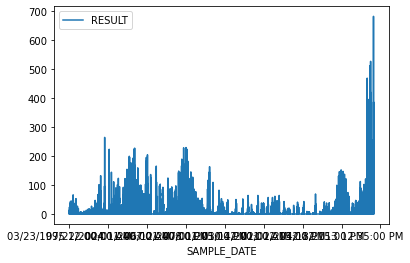

In [66]:
data = pd.DataFrame(rawData)

data.drop(["MEDIUM", "QUALIFIER", "SAMPLE_ID", "SAMPLE_SITE_NO", "METHOD", "PROJECT", "QC_FLAG", "DATA_REF_NO", "QC_TYPE", "TIME_NULL", "FILTER"], axis=1, inplace=True)

data[data["PARAM_TYPE"] == "Salamanders"].plot(x="SAMPLE_DATE", y="RESULT")

#Formatted date column

data["SAMPLE_DATE"] = data["SAMPLE_DATE"].map(lambda x: x.split(" ")[0])
print(row.index)
data.groupby(["SAMPLE_DATE", "SITE_NAME", "PARAM_TYPE"], dropna=False).mean().head(1000)

data.head(1000)

In [70]:
# condition mask
#mask = rawData['PARAM_TYPE'] == 'Salamanders'
 
# new dataframe with selected rows
#df_new = pd.DataFrame(rawData[mask])

# number of sample dataframes collected
count = 0 
for index, row in pd.DataFrame(data[data['PARAM_TYPE'] == 'Salamanders']).groupby(["SAMPLE_REF_NO"], dropna=False).mean().iterrows():
    mask = data["SAMPLE_REF_NO"] == index
    sampleDF = pd.DataFrame(data[mask]) # Dataframe containing all features relating so a single sample
    # TODO: Extract available features i.e. for feature in parameters:
    #                                           row with sampleDF[PARAM_TYPE] == feature
    #                                           add(row[Result]) to sampleSeries[feature.index]
    #                                       add(sampleSeries) to samplesDataFrame
    #   
    for feature in parameters:
        getParameter(sampleDF, feature)

    count+=1

print(count, " sample data frames seen")


5.0
0.0
19.0
1.0
0.0
0.0
40.0
140.0
0.0
4.0
0.0
0.0
0.0
0.0
50.0
182.0
0.0
7.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
60.0
0.0
1.0
0.0
0.0
0.0
0.0
60.0
0.0
0.0
0.0
0.0
0.0
0.0
33.0
0.0
4.0
0.0
0.0
0.0
0.0
47.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
70.0
54.5
0.0
0.0
0.0
0.0
0.0
0.0
40.0
78.5
0.0
0.0
0.0
0.0
0.0
0.0
29.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
20.0
0.0
2.0
2.0
0.0
2.0
2.0
0.0
0.0
19.0
0.0
0.0
0.0
0.0
0.0
0.0
24.0
0.0
0.0
0.0
0.0
0.0
0.0
9.0
0.0
0.0
4.0
0.0
4.0
0.0
0.0
19.0
1.0
0.0
5.0
0.0
1.0
5.0
0.0
0.0
23.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
17.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
27.0
2.0
2.0
4.0
0.0
3.0
1.0
2.0
1.0
1.0
0.0
0.0
20.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
13.0
0.0
2.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
96.0
0.0
3.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
181.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
75.0
2.0
2.0
1.0
0.0
2.0
2.0
0.0
0.0
28.0
0.0
0.0
0.0
0.0
0.0
10.0
1.0
7.0
0.0
0.0
1.0
7.0
0.0
0.0
55.0
0.0
0.0
0.0
0.0
0.0
0.0
10.0
3.0
8.0
1.0
0.0
1.0
3.0
8.0
0.0
0.0
49.0
1.0
2.0
0.0
0.0
1.0
2.0
0.0
0.0
32.0
4.0
3

KeyboardInterrupt: 